In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(29)

n_trials = 100_000

### 1. How likely is it that you roll doubles when rolling two dice?

In [86]:
n_dice = 2

rolls = np.random.choice([1, 2, 3, 4, 5, 6], size = (n_trials, n_dice))
rolls

array([[6, 4],
       [5, 6],
       [3, 1],
       ...,
       [5, 6],
       [5, 5],
       [6, 5]])

In [87]:
rolls_df = pd.DataFrame(rolls, columns=['roll_1', 'roll_2'])
rolls_df.head()

,roll_1,roll_2
0,6,4
1,5,6
2,3,1
3,1,2
4,2,1


In [88]:
rolls_df["doubles"] = rolls_df['roll_1'] == rolls_df["roll_2"]



In [89]:
rolls_df.doubles.mean()

0.16645

### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [90]:
#Get trial prepared, 10,000 flips of 8 coins

n_coin = ncols = 8

#True is heads and False is tails
flips = np.random.choice([True, False], size = (n_trials, n_coin))

In [91]:
#simulated flip data
flips

array([[False,  True,  True, ..., False,  True,  True],
       [ True,  True, False, ...,  True, False, False],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ..., False,  True,  True],
       [False,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ...,  True, False,  True]])

In [92]:
#Convert to a DataFrame
flips_df = pd.DataFrame(flips, columns=['coin_1', \
    'coin_2','coin_3', 'coin_4', 'coin_5', 'coin_6','coin_7', 'coin_8'])

In [93]:
flips_df

,coin_1,coin_2,coin_3,coin_4,coin_5,coin_6,coin_7,coin_8
0,False,True,True,False,False,False,True,True
1,True,True,False,False,False,True,False,False
2,True,True,False,True,False,True,True,True
3,True,True,False,False,False,False,True,True
4,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...
99995,False,True,False,False,True,True,False,False
99996,False,True,True,False,True,False,True,False
99997,False,True,True,True,False,False,True,True
99998,False,True,True,True,True,False,True,False


In [94]:
#add a column that shows if there are exactly three heads in the row
flips_df['exact_3'] = flips.sum(axis=1)==3

#add a column that shows if there are more than three heads in the row
flips_df['more_than_3'] = flips.sum(axis=1)>3

In [95]:
flips_df

,coin_1,coin_2,coin_3,coin_4,coin_5,coin_6,coin_7,coin_8,exact_3,more_than_3
0,False,True,True,False,False,False,True,True,False,True
1,True,True,False,False,False,True,False,False,True,False
2,True,True,False,True,False,True,True,True,False,True
3,True,True,False,False,False,False,True,True,False,True
4,False,False,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
99995,False,True,False,False,True,True,False,False,True,False
99996,False,True,True,False,True,False,True,False,False,True
99997,False,True,True,True,False,False,True,True,False,True
99998,False,True,True,True,True,False,True,False,False,True


In [96]:
#probability there are exactly 3 heads
flips_df.exact_3.mean()

0.21889

In [97]:
#probability there are more than 3 heads
flips_df.more_than_3.mean()

0.63692

### 3. There are approximately 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [104]:
n_billboards = 2 #number of billboards

#simmulate choosing web dev or data s between two billboards
billboards = np.random.choice(['web', 'web', 'web','data'], size = (n_trials, n_billboards))

billboards

array([['web', 'data'],
       ['data', 'web'],
       ['web', 'web'],
       ...,
       ['web', 'web'],
       ['web', 'data'],
       ['web', 'web']], dtype='<U4')

In [109]:
#check to see if data appears in each row and sum them (True = 1, False=0)
(billboards == 'data').sum(axis=1)

#if both 'data' then the row = 2 (both billboards are data science)

array([1, 1, 0, ..., 0, 1, 0])

In [110]:
#take the average of those that are both data science over all billboard combinations
((billboards == 'data').sum(axis=1)==2).mean()

0.06294

#### Converting from probabilty to odds:

In [182]:
p = ((billboards == 'data').sum(axis=1)==2).mean()

In [183]:
#probability of seeing anything else
1-p

0.93706

In [185]:
odds = p/(1-p)
odds

0.06716752395791091

In [186]:
1/odds

14.888147442008263

### 4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

In [115]:
#loc=mean=3, scale=std=1.5, size=(number of trials, days(Monday-Friday))
poptarts_bought_daily = np.random.normal(loc=3, scale=1.5, \
                                         size=(n_trials, 5))

In [116]:
poptarts_bought_daily

array([[ 2.35802341,  5.10277719,  1.65117942,  5.59885666,  2.98282646],
       [ 3.32063288,  1.85430668,  4.84356079,  0.14693289,  2.87095589],
       [ 2.92182357, -0.09357477,  2.22993603,  1.72368649,  2.93083573],
       ...,
       [ 3.41596524,  3.68143533,  7.35479291, -1.0426757 ,  3.36993366],
       [ 4.25267175,  3.58465065,  5.24480855,  1.78202882,  2.56256109],
       [ 1.25580861,  3.60496047,  3.68757253,  5.713113  ,  5.82922153]])

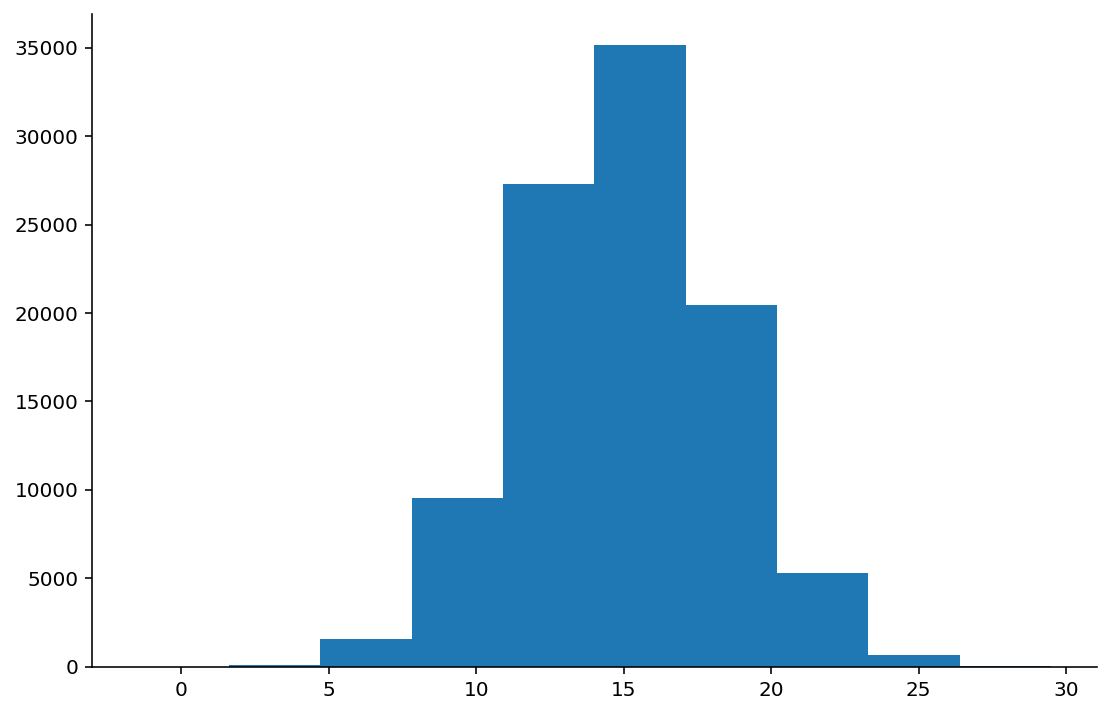

In [189]:
plt.hist(poptarts_bought_daily.sum(axis=1));

In [118]:
#sum daily poptart purchases to get weekly purchases
poptarts_bought_weekly = poptarts_bought_daily.sum(axis=1)

In [119]:
poptarts_bought_weekly

array([17.69366313, 13.03638913,  9.71270704, ..., 16.77945144,
       17.42672087, 20.09067615])

In [121]:
#Started with 17 poptarts
#probability that there will still be a poptart left on Friday
(poptarts_bought_weekly < 17).mean()

0.72563

### 5. Compare Heights
- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use np.random.normal to generate observations.
- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [122]:
men_avg = 178
men_std = 8

women_avg = 170
women_std = 6

In [124]:
#get 100,000 men's height
men_random = np.random.normal(loc=men_avg, scale=men_std, size=n_trials)
men_random

array([183.55257073, 173.24718378, 188.34016077, ..., 162.10914107,
       188.40049683, 170.81662586])

In [125]:
##get 100,000 women's height
women_random = np.random.normal(loc=women_avg, scale=women_std, size=n_trials)
women_random

array([165.16899926, 173.62129859, 162.72391652, ..., 165.25679018,
       164.31845689, 163.67792402])

In [128]:
#compare women's and men's heights and see where women are taller than men
#find the probability that women are taller
(women_random > men_random).mean()

0.21143

### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 

In [132]:
random_50 = np.random.choice(['ok','fail'], size = (n_trials, 50), p = [249/250,1/250])

In [141]:
((random_50=='ok').sum(axis=1)==50).mean()

0.81723

#### 100 students?

In [142]:
random_100 = np.random.choice(['ok','fail'], size = (n_trials, 100), p = [249/250,1/250])

In [143]:
((random_100=='ok').sum(axis=1)==100).mean()

0.67195

#### What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [146]:
random_150 = np.random.choice(['ok','fail'], size = (n_trials, 150), p = [249/250,1/250])
((random_150=='ok').sum(axis=1)!=150).mean()

0.45179

#### How likely is it that 450 students all download anaconda without an issue?

In [147]:
random_450 = np.random.choice(['ok','fail'], size = (n_trials, 450), p = [249/250,1/250])
((random_450=='ok').sum(axis=1)==450).mean()

0.16286

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [154]:
truck_here = .7
n_days = 3

food_truck = np.random.random(size =(n_trials, n_days))

In [155]:
food_truck

array([[0.63230523, 0.91709914, 0.95723105],
       [0.18551665, 0.21986828, 0.7434407 ],
       [0.89757914, 0.28154564, 0.17339973],
       ...,
       [0.93856119, 0.72387532, 0.53797053],
       [0.53797141, 0.5246701 , 0.54811731],
       [0.49192336, 0.99964633, 0.24335078]])

In [157]:
food_truck_here = food_truck < truck_here

In [159]:
food_truck_here.sum(axis=1)

array([1, 2, 2, ..., 1, 3, 2])

In [161]:
(food_truck_here.sum(axis=1)==0).mean()

0.0272

#### How likely is it that a food truck will show up sometime this week?

In [163]:
n_days = 5

food_truck_week = np.random.random(size =(n_trials, n_days))

In [164]:
food_truck_week

array([[0.82306654, 0.56839773, 0.53597365, 0.62288077, 0.6177578 ],
       [0.39405345, 0.74564138, 0.72905409, 0.07505068, 0.07901994],
       [0.48669953, 0.66421494, 0.36204147, 0.44529886, 0.94655374],
       ...,
       [0.91205846, 0.32869463, 0.2892903 , 0.53458956, 0.92207472],
       [0.71467901, 0.81790789, 0.33622127, 0.28066415, 0.32420122],
       [0.51061393, 0.41173855, 0.7884821 , 0.34657996, 0.54014294]])

In [165]:
food_truck_here_wk = food_truck_week < truck_here

In [166]:
(food_truck_here_wk.sum(axis=1) > 0).mean()

0.99755

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? 

In [191]:
birthdays = np.random.choice(range(1, 366), size=(n_trials, 23))
birthdays

array([[237,  35, 297, ..., 315,  12,  25],
       [  4, 205, 335, ...,  21, 210,  60],
       [221,  85, 188, ...,  68, 303, 335],
       ...,
       [214, 337, 277, ..., 326, 303, 299],
       [356,  44, 182, ...,   9, 345,   3],
       [227,  51,  36, ..., 222, 153, 336]])

In [192]:
birthdays_df = pd.DataFrame(birthdays)
birthdays_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,237,35,297,353,362,212,354,351,95,242,...,152,321,165,131,16,103,168,315,12,25
1,4,205,335,283,14,151,206,280,160,213,...,307,209,251,67,105,258,194,21,210,60
2,221,85,188,45,286,108,122,207,316,304,...,185,335,17,5,180,171,233,68,303,335
3,133,12,229,238,155,290,335,221,149,343,...,172,311,93,178,289,217,357,163,56,263
4,290,342,19,231,93,235,275,132,234,221,...,96,18,66,124,93,351,354,194,1,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,327,76,143,203,6,167,274,342,121,280,...,258,8,230,114,155,334,314,235,247,318
99996,249,357,5,108,271,326,210,251,136,73,...,142,236,133,35,134,297,22,345,115,92
99997,214,337,277,56,310,273,266,144,344,183,...,293,253,166,122,268,161,269,326,303,299
99998,356,44,182,225,16,36,221,296,254,250,...,94,341,253,333,213,22,66,9,345,3


In [174]:
(birthdays_df.nunique(axis=1) < 23).mean()

0.50488

In [193]:
p = (birthdays_df.nunique(axis=1) < 23).mean()
odds = p/(1-p)
odds

1.036950278043713

In [177]:
#exactly 2 people have the same birthday
(birthdays_df.nunique(axis=1) == 22).mean()

0.36056

#### What if it's 20 people? 

In [175]:
birthdays_20 = np.random.choice(range(366), size=(n_trials, 20))
birthdays_20_df = pd.DataFrame(birthdays_20)

In [176]:
(birthdays_20_df.nunique(axis=1) < 20).mean()

0.41296

#### 40?

In [178]:
birthdays_40 = np.random.choice(range(366), size=(n_trials, 40))
birthdays_40_df = pd.DataFrame(birthdays_40)

In [195]:
(birthdays_40_df.nunique(axis=1) < 40).mean()

0.88994

In [194]:
#only two people have the same bday
(birthdays_40_df.nunique(axis=1) == 39).mean()

0.26063

### 17? (Number of students in our class)

In [181]:
birthdays_17 = np.random.choice(range(366), size=(n_trials, 17))
birthdays_17_df = pd.DataFrame(birthdays_17)

(birthdays_17_df.nunique(axis=1) < 17).mean()

0.31472